In [1]:
!wget http://hck.re/kkBIfM

--2019-10-09 06:39:17--  http://hck.re/kkBIfM
Resolving hck.re (hck.re)... 13.229.0.124, 52.220.84.86, 54.255.161.167
Connecting to hck.re (hck.re)|13.229.0.124|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Cookie coming from hck.re attempted to set domain to hackerearth.com
Cookie coming from hck.re attempted to set domain to hackerearth.com
Cookie coming from hck.re attempted to set domain to hackerearth.com
Location: https://he-public-data.s3-ap-southeast-1.amazonaws.com/DataSet.zip [following]
--2019-10-09 06:39:18--  https://he-public-data.s3-ap-southeast-1.amazonaws.com/DataSet.zip
Resolving he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)... 52.219.36.196
Connecting to he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)|52.219.36.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 733209860 (699M) [application/zip]
Saving to: ‘kkB

In [2]:
!ls

kkBIfM	sample_data


In [0]:
import os

In [0]:
os.rename("kkBIfM", "data.zip")

In [5]:
!unzip "/content/data.zip"

Archive:  /content/data.zip
   creating: DataSet/
 extracting: DataSet/Test Images.zip  
  inflating: DataSet/test.csv        
  inflating: DataSet/train.csv       
 extracting: DataSet/Train Images.zip  


In [6]:
!unzip "/content/DataSet/Test Images.zip" -d "test_data"
!unzip "/content/DataSet/Train Images.zip" -d "train_data"

Archive:  /content/DataSet/Test Images.zip
   creating: test_data/Test Images/
  inflating: test_data/Test Images/lg898 (25).png  
  inflating: test_data/Test Images/lg171 (187).png  
  inflating: test_data/Test Images/lg898 (204).png  
  inflating: test_data/Test Images/lg566 (342).png  
  inflating: test_data/Test Images/lgl85 (133).png  
  inflating: test_data/Test Images/lgl60 (275).png  
  inflating: test_data/Test Images/lg76 (162).png  
  inflating: test_data/Test Images/lgl 10 (97).png  
  inflating: test_data/Test Images/lgl125 (384).png  
  inflating: test_data/Test Images/lgl 10 (22).png  
  inflating: test_data/Test Images/lg56 (89).png  
  inflating: test_data/Test Images/lgl 10 (117).png  
  inflating: test_data/Test Images/lgl85 (303).png  
  inflating: test_data/Test Images/lgl125 (242).png  
  inflating: test_data/Test Images/lg87 (364).png  
  inflating: test_data/Test Images/lgl305 (131).png  
  inflating: test_data/Test Images/lgl30 (72).png  
  inflating: test_data

In [0]:
import pandas as pd
import numpy as np


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
data = pd.read_csv("/content/DataSet/train.csv")

In [10]:
data.head()

,Image_File,Class
0,clean2416.png,Large
1,ground4022.png,Small
2,ground0340.png,Small
3,ground2110.png,Small
4,clean1581.png,Large


In [0]:
path = "/content/train_data/Train Images/"

In [0]:
sz=128
bs=32
np.random.seed(42)
tfms = get_transforms(do_flip=True,flip_vert=True, max_lighting=0.2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
          ds_tfms=tfms, size=sz, num_workers=4,bs=32).normalize(imagenet_stats)

In [13]:
data.classes

['Large', 'Small']

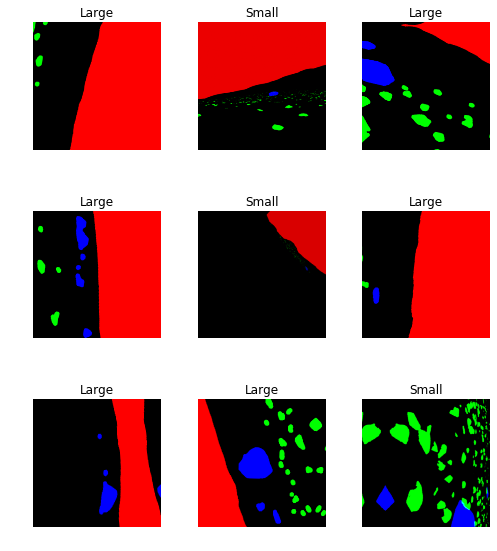

In [14]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Large', 'Small'], 2, 9599, 2399)

In [16]:
pip install timm

     |████████████████████████████████| 122kB 2.8MB/s 


In [0]:
import timm
import tensorflow as tf

In [0]:
learn = cnn_learner(data ,models.resnet50 , metrics=[accuracy,error_rate]).to_fp16()

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


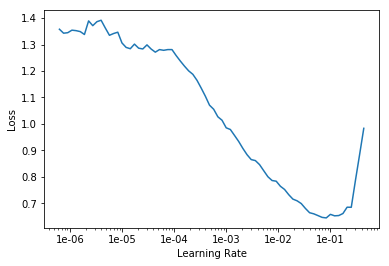

In [20]:
learn.recorder.plot()

In [0]:
lr= 1e-02

In [27]:
learn.fit_one_cycle(4,slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.165369,0.065803,0.986244,0.013756,02:53
1,0.095700,0.020697,0.992914,0.007086,02:58
2,0.046815,0.006397,0.997499,0.002501,03:03
3,0.042142,0.005757,0.997916,0.002084,03:04


In [0]:
learn.save("stage1")

In [0]:
learn.unfreeze()

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


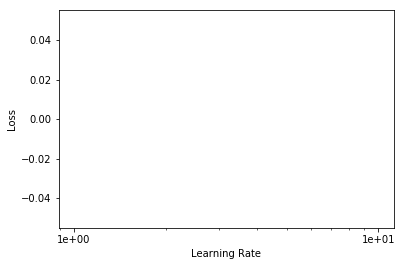

In [32]:
learn.recorder.plot()

In [34]:
learn.load("stage1")

Learner(data=ImageDataBunch;

Train: LabelList (9599 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Large,Large,Large,Large,Large
Path: /content/train_data/Train Images;

Valid: LabelList (2399 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Large,Small,Small,Large,Large
Path: /content/train_data/Train Images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=

In [0]:
learn.unfreeze()

In [0]:
lr = 1e-04

In [37]:
learn.fit_one_cycle(2,slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.032552,0.005907,0.997499,0.002501,03:15
1,0.029870,0.004469,0.998333,0.001667,03:11


In [0]:
learn.save("stage2")

**PROGRESSIVE RESIZING APPROACH**

In [0]:
sz=256
bs=32
np.random.seed(42)
tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
          ds_tfms=tfms, size=sz, num_workers=4,bs=32).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data ,models.resnet50 , metrics=[accuracy,error_rate]).to_fp16()

In [41]:
learn.load("stage2")

Learner(data=ImageDataBunch;

Train: LabelList (9599 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Large,Large,Large,Large,Large
Path: /content/train_data/Train Images;

Valid: LabelList (2399 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Large,Small,Small,Large,Large
Path: /content/train_data/Train Images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=

In [0]:
learn.freeze()

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


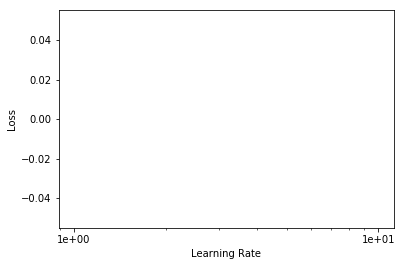

In [44]:
learn.recorder.plot()

In [0]:
lr = 1e-4

In [46]:
learn.fit_one_cycle(3,slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.033642,0.003283,0.999166,0.000834,04:07
1,0.018183,0.002021,0.999583,0.000417,04:07
2,0.015146,0.002073,0.999583,0.000417,04:08


In [0]:
learn.save("stage3")

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

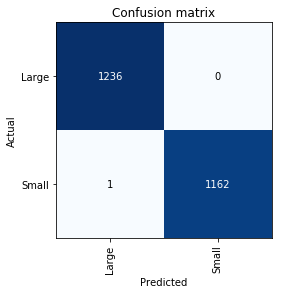

In [49]:
interp.plot_confusion_matrix()


In [0]:
#sz=300
#bs=32
#tfms = get_transforms(do_flip=True,flip_vert=True)
#data = (ImageList.from_df(df=df,path="train_data/Train Images/",cols='name') 
       # .split_by_rand_pct()
        #.split_from_df(col="val")
        #.label_from_df(cols='label') 
       # .transform(tfms,size=sz)#, padding_mode='border' , resize_method=ResizeMethod.SQUISH)
       # .databunch(bs=bs,num_workers=4) 
        #.normalize(imagenet_stats)  
      # )

In [0]:
submit = pd.read_csv("/content/DataSet/test.csv")

In [51]:
submit.head()

,Image_File,Class
0,lg 988 (1).png,NaN
1,lg 988 (10).png,NaN
2,lg 988 (100).png,NaN
3,lg 988 (101).png,NaN
4,lg 988 (102).png,NaN


In [0]:
learn.data.add_test(ImageList.from_df(submit,
                                      '/content/test_data/Test Images',
                                      cols='Image_File'))

In [0]:
pred = learn.get_preds(DatasetType.Test)


In [54]:
pred[0]

tensor([[6.5898e-08, 1.0000e+00],
        [7.6420e-10, 1.0000e+00],
        [8.3327e-06, 9.9999e-01],
        ...,
        [1.0000e+00, 4.6282e-07],
        [9.9999e-01, 1.0996e-05],
        [9.9999e-01, 8.8701e-06]])

In [0]:
pre = pred[0]

In [0]:
pre = pre.argmax(1)

In [57]:
pre

tensor([1, 1, 1,  ..., 0, 0, 0])

In [0]:
pre = pd.DataFrame(pre)

In [0]:
pre.columns=["Class"]

In [60]:


pre.tail(10)

,Class
7524,0
7525,0
7526,0
7527,0
7528,0
7529,0
7530,0
7531,0
7532,0
7533,0


In [0]:
sub = submit.drop(columns=["Class"])

In [62]:
sub.head()

,Image_File
0,lg 988 (1).png
1,lg 988 (10).png
2,lg 988 (100).png
3,lg 988 (101).png
4,lg 988 (102).png


In [0]:
sub = pd.concat([sub,pre],axis=1)

In [64]:
sub.head()

,Image_File,Class
0,lg 988 (1).png,1
1,lg 988 (10).png,1
2,lg 988 (100).png,1
3,lg 988 (101).png,1
4,lg 988 (102).png,1


In [0]:
sub["Class"]=sub["Class"].map({1:"Small",0:"Large"})

In [66]:
sub.head()

,Image_File,Class
0,lg 988 (1).png,Small
1,lg 988 (10).png,Small
2,lg 988 (100).png,Small
3,lg 988 (101).png,Small
4,lg 988 (102).png,Small


In [0]:
sub.to_csv("ensemble5.csv", index=False)